In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

# Importing sklearn library for Classification Model, Cross Validation, Text Features Extraction and Ranking of best features.
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate
from sklearn.externals import joblib 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Importing nltk library for Sentiment score and POS tagging 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus.reader import TaggedCorpusReader 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

import string

import statsmodels.api as sm







[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
pip install mxnet


     |████████████████████████████████| 25.4MB 372kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
pip install gluon


     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 112kB 8.7MB/s 
     |████████████████████████████████| 4.8MB 65.3MB/s 
     |████████████████████████████████| 184kB 51.3MB/s 
     |████████████████████████████████| 92kB 13.4MB/s 
     |████████████████████████████████| 133kB 63.1MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
     |████████████████████████████████| 81kB 13.8MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 133kB 64.1MB/s 
     |████████████████████████████████| 122kB 52.2MB/s 
     |████████████████████████████████| 122kB 56.8MB/s 
     |████████████████████████████████| 317kB 55.5MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 112kB 65.4MB/s 
     |████████████████████████████████| 1.1MB 53.3MB/s 
   

In [0]:
pip install gluonnlp

     |████████████████████████████████| 245kB 2.8MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.8.1-cp36-none-any.whl size=293520 sha256=53e9e9b450521e432364deef4177cba991244b3e7a5a426df88373cf8796130d
  Stored in directory: /root/.cache/pip/wheels/3e/e7/3e/9cdf8ad7fce112fde2f4a52604045e5dd80f84d645bedb70c7
Successfully built gluonnlp


In [0]:
pip install emoji

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42175 sha256=053398fcd3eb34dae4060a0fd15073de6bb1a651edef9eab19a094d5ebe68888
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
from mxnet import gluon
from mxnet import nd
import gluonnlp as nlp
import re
import math
import emoji
from nltk.tokenize import sent_tokenize, word_tokenize

In [0]:
glove_6b100d = nlp.embedding.create('glove', source='glove.6B.100d')

Embedding file glove.6B.100d.npz is not found. Downloading from Gluon Repository. This may take some time.


Retrieving Dataset from Drive to Dataframe

In [0]:

dataframe = pd.read_excel('/content/drive/My Drive/DATASET FINAL/DatasetFinal.xlsx')
#print(dataframe.columns)
#cols = [ 'label', 'followsCount', 'postsCount','followersCount','noun', 'verb', 'adjective',
#       'adverb']
dataframe = dataframe.drop(['firstComment', 'text_wo_emoji'], axis=1)
#dataframe = dataframe[cols]
dataframe.columns


Index(['label', 'textWeight', 'H', 'S', 'V', 'followersCount', 'fc/foc',
       'likesCount', 'faceCount', 'followsCount', 'postsCount', 'lc/fc',
       'in-outdoor', 'noun', 'verb', 'adjective', 'adverb', 'compound', 'neg',
       'neu', 'pos'],
      dtype='object')

Dataframe Values dropping null values (if present)

In [0]:
dataframe = dataframe.dropna(axis=0)
data = dataframe.values
print (data.shape)

(8295, 21)


Dividing labels and features to input


In [0]:
X = data[:, 1:] #input
Y = data[:, 0]  #labels
print (X.shape)
print (Y.shape)

(8295, 20)
(8295,)


Dividing Training and Testing dataset.

In [0]:
#split = int(0.8*X.shape[0])
#X_train = X[:split]
#Y_train = Y[:split]

#X_test = X[split:]
#Y_test = Y[split:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=51)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print (X_train.shape)
print (X_test.shape)

print (Y_train.shape)
print (Y_test.shape)


(6636, 20)
(1659, 20)
(6636,)
(1659,)


Plotting features with their correlation values.

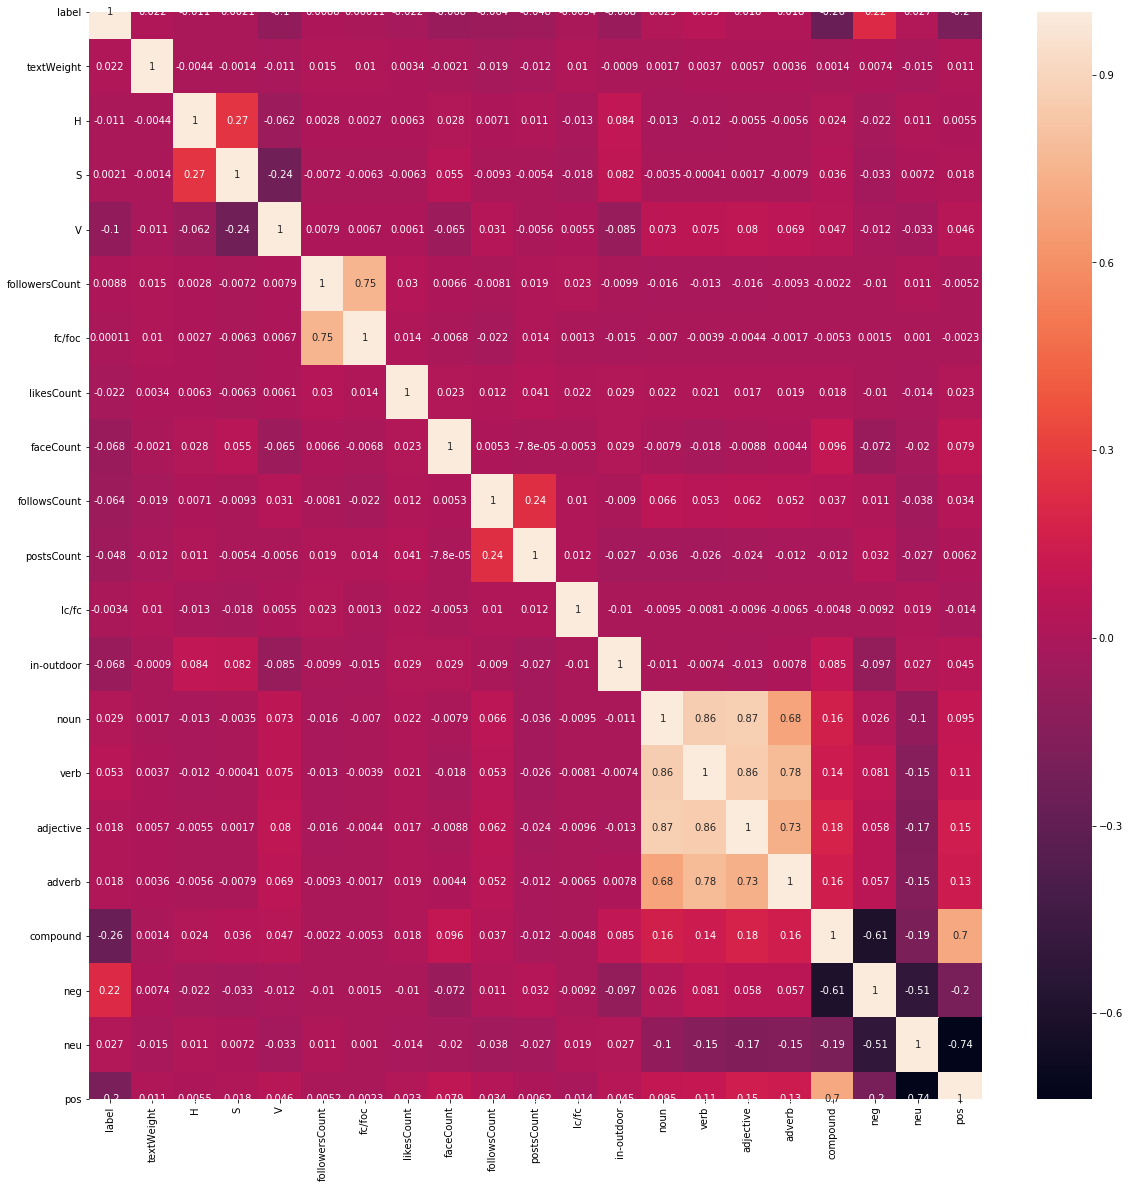

In [0]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataframe.corr(),annot=True)

Calculating best parameters for random forest classifier.

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 3000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Using the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,Y_train)
print(rf_random.best_params_)

Random Forest Classifier


In [0]:
rf = RandomForestClassifier(bootstrap= True, max_depth= 10, n_estimators= 2353, min_samples_split=5,min_samples_leaf=1,max_features='auto' ) 
rf.fit(X_train, Y_train)
print (rf.score(X_test, Y_test))

y_pred_default = rf.predict(X_test)

# Printing classification report
print(classification_report(Y_test, y_pred_default))
print(confusion_matrix(Y_test,y_pred_default))

0.4496684749849307
              precision    recall  f1-score   support

         1.0       0.49      0.70      0.58       426
         2.0       0.45      0.43      0.44       425
         3.0       0.47      0.22      0.30       415
         4.0       0.39      0.44      0.41       393

    accuracy                           0.45      1659
   macro avg       0.45      0.45      0.43      1659
weighted avg       0.45      0.45      0.43      1659

[[300  52  20  54]
 [ 92 182  40 111]
 [119  95  92 109]
 [101  75  45 172]]


In [0]:
rfe = RFE(rf,10)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)
print(dataframe.columns)

KeyboardInterrupt: ignored

In [0]:



# Save the model as a pickle in a file 
joblib.dump(rf, '/content/drive/My Drive/DATASET FINAL/modelTrainedrf.pkl') 

# Load the model from the file 
rf_from_joblib = joblib.load('/content/drive/My Drive/DATASET FINAL/modelTrainedrf.pkl') 

df  = pd.read_excel('/content/drive/My Drive/DATASET FINAL/DatasetFinal.xlsx')
df = df.drop(['firstComment', 'text_wo_emoji'], axis=1)
df = df.iloc[1000:1020, ]
data = df.values
print(data.shape)
toPredict = data[: , 1:]
print(data[:, 0:1])


# Use the loaded model to make predictions 
print(classification_report(data[:, 0:1], rf_from_joblib.predict(toPredict) ))


rf_from_joblib.predict(toPredict) 


(20, 21)
[[2.]
 [3.]
 [2.]
 [4.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [2.]
 [2.]
 [3.]
 [3.]
 [1.]
 [3.]
 [1.]
 [1.]
 [2.]
 [1.]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.17      0.40      0.24         5
         3.0       0.50      0.50      0.50         8
         4.0       0.00      0.00      0.00         3

    accuracy                           0.30        20
   macro avg       0.17      0.23      0.18        20
weighted avg       0.24      0.30      0.26        20



array([3., 3., 3., 2., 3., 2., 2., 3., 3., 2., 2., 3., 2., 3., 2., 2., 2.,
       2., 2., 2.])

Cross Validation


In [0]:
cv_results = cross_validate(rf, X, Y, cv=10)
sorted(cv_results.keys())                         

print(cv_results['test_score'])

[0.47051745 0.4488568  0.41756919 0.45662651 0.42289157 0.43373494
 0.41183575 0.4468599  0.45048309 0.44444444]


In [0]:
scores = cross_validate(rf, X, Y, cv=10,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      

print(scores['train_r2'])

In [0]:

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])
            
            for i in labels:

                plt.figure()
                lw = 2
                plt.plot(fpr[i], tpr[i], color='darkorange',
                lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
                plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title('Receiver operating characteristic example')
                plt.legend(loc="lower right")
                plt.show()

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

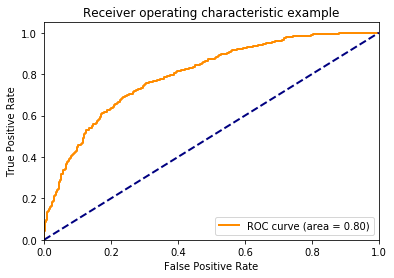

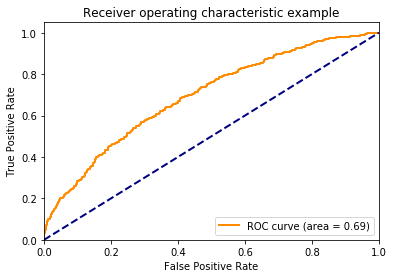

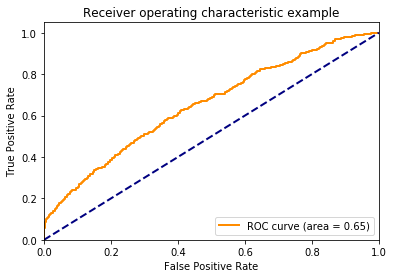

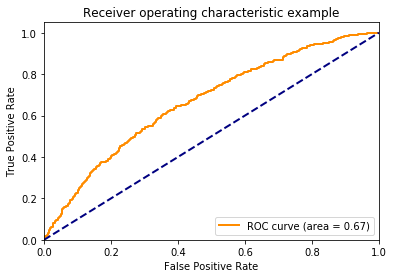

             precision    recall  f1-score  support    pred       AUC
1.0           0.490196  0.704225  0.578035    426.0   612.0  0.796647
2.0           0.450495  0.428235  0.439083    425.0   404.0  0.693485
3.0           0.467005  0.221687  0.300654    415.0   197.0  0.651337
4.0           0.385650  0.437659  0.410012    393.0   446.0  0.666427
avg / total   0.449458  0.449668  0.433248   1659.0  1659.0  0.708281


In [0]:

report_with_auc = class_report(
    y_true=Y_test, 
    y_pred=rf.predict(X_test), 
    y_score=rf.predict_proba(X_test))

print(report_with_auc)

Logistic Regression

In [0]:
lr = LogisticRegression() 
                          
lr.fit(X_train, Y_train)
print (lr.score(X_test, Y_test))

y_pred_default = lr.predict(X_test)

# Printing classification report
print(classification_report(Y_test, y_pred_default))
print(confusion_matrix(Y_test,y_pred_default))

0.3779385171790235
              precision    recall  f1-score   support

         1.0       0.45      0.70      0.55       426
         2.0       0.36      0.40      0.38       425
         3.0       0.28      0.09      0.13       415
         4.0       0.31      0.30      0.31       393

    accuracy                           0.38      1659
   macro avg       0.35      0.37      0.34      1659
weighted avg       0.35      0.38      0.34      1659

[[300  61  19  46]
 [111 172  34 108]
 [134 135  36 110]
 [121 112  41 119]]


In [0]:
# Save the model as a pickle in a file 
joblib.dump(lr, '/content/drive/My Drive/DATASET FINAL/modelTrainedlr.pkl') 

# Load the model from the file 
lr_from_joblib = joblib.load('/content/drive/My Drive/DATASET FINAL/modelTrainedlr.pkl') 

df  = pd.read_excel('/content/drive/My Drive/DATASET FINAL/DatasetFinal.xlsx')
df = df.drop(['firstComment', 'text_wo_emoji'], axis=1)
df = df.iloc[1000:1020, ]
data = df.values
print(data.shape)
toPredict = data[: , 1:]
print(data[:, 0:1])


# Use the loaded model to make predictions 
print(classification_report(data[:, 0:1], lr_from_joblib.predict(toPredict) ))


lr_from_joblib.predict(toPredict) 

(20, 21)
[[2.]
 [3.]
 [2.]
 [4.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [2.]
 [2.]
 [3.]
 [3.]
 [1.]
 [3.]
 [1.]
 [1.]
 [2.]
 [1.]]
              precision    recall  f1-score   support

         1.0       0.67      0.50      0.57         4
         2.0       0.29      0.80      0.42         5
         3.0       0.00      0.00      0.00         8
         4.0       0.33      0.33      0.33         3

    accuracy                           0.35        20
   macro avg       0.32      0.41      0.33        20
weighted avg       0.25      0.35      0.27        20



array([2., 2., 4., 2., 2., 2., 4., 2., 2., 4., 2., 2., 2., 2., 1., 1., 1.,
       2., 2., 2.])

RFE (features ranking)

In [0]:
rfe = RFE(lr,1)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)
print(dataframe.columns)

[False False False False False False False False False False False False
 False False False False False  True False False]
[15 14  7 13 20 19 17  8 16 18  4  5 12 10 11  9  3  1  6  2]
Index(['label', 'textWeight', 'H', 'S', 'V', 'followersCount', 'fc/foc',
       'likesCount', 'faceCount', 'followsCount', 'postsCount', 'lc/fc',
       'in-outdoor', 'noun', 'verb', 'adjective', 'adverb', 'compound', 'neg',
       'neu', 'pos'],
      dtype='object')


Cross Validation

In [0]:
cv_results = cross_validate(lr, X, Y, cv=10)
sorted(cv_results.keys())                         

print(cv_results['test_score'])



[0.27065868 0.29736211 0.26258993 0.30695444 0.27577938 0.23741007
 0.25810324 0.28331333 0.28691477 0.27370948]


In [0]:
scores = cross_validate(lr, X, Y, cv=10,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])      

print(scores['train_r2'])

In [0]:

report_with_auc = class_report(
    y_true=Y_test, 
    y_pred=lr.predict(X_test), 
    y_score=lr.predict_proba(X_test))

print(report_with_auc)

Post Caption Analysis using Deep Learning

In [0]:
vocab = nlp.Vocab(nlp.data.Counter(glove_6b100d.idx_to_token))
vocab.set_embedding(glove_6b100d)

In [0]:

df = pd.read_excel('/content/drive/My Drive/DATASET FINAL/DatasetFinal.xlsx')
df  = df.iloc[101:102, ]
text = str(df['firstComment'])
text

'101    No fireworks for me tonight as Ronnie  does NO...\nName: firstComment, dtype: object'

In [0]:
emj = word_tokenize(text)
emj
emoj = [c for c in emj if c in emoji.UNICODE_EMOJI]
emoj

[]

In [0]:
from keras.preprocessing.text import text_to_word_sequence
from nltk.stem import PorterStemmer
import string

sample = []
entity_pre = ['@','#']
    #tokenize the text, lowering and filtering
for tt in df['firstComment']:
  result = text_to_word_sequence(tt, filters='!"$%&()*+,-./:;<=>?[\\]^_`{|}~\t\n', lower=True)
for j in result:
  if j[0] not in entity_pre:    #removing # and @
    sample.append(j)
vtext = [word for word in sample if word.isalpha()]
print(vtext)

Using TensorFlow backend.


['no', 'fireworks', 'for', 'me', 'tonight', 'as', 'ronnie', 'does', 'not', 'like', 'them', 'so', 'the', 'curtains', 'have', 'been', 'drawn', 'the', 'music', 'has', 'been', 'turned', 'up', 'and', 'hot', 'chocolate', 'with', 'cream', 'and', 'marshmallows', 'ginger', 'biscuits', 'and', 'snuggles', 'on', 'the', 'sofa', 'for', 'us']


In [0]:
def cos_sim(x, y):
    return nd.dot(x, y) / (nd.norm(x) * nd.norm(y))


def dot_prod(x, y):
  return nd.dot(x, y)



def softmax(x):
    c = 0
    for i in x:
      c = c + np.exp(i)
    d = []
    for i in x:
      d.append(np.exp(i) / c)
    return d



def sig(x):
  return 1/(1+np.exp(-x))



def lg(x):
  return math.log(x)

In [0]:
def prob(rel, word):
  tx = []
  for i in rel:
    if (dot_prod(vocab.embedding[i], vocab.embedding[word]) == 0.0):
      continue
    si = cos_sim(vocab.embedding[i], vocab.embedding[word])
    tx.append(si.asnumpy()[0])
    #print(softmax(tx))
  ab = softmax(tx)
  ab = [round(x,3) for x in ab]
  return ab

In [0]:

with (open('/content/drive/My Drive/DATASET FINAL/angry_weights.pickle','rb')) as ang:
  U_A = pickle.load(ang)
  W_A = pickle.load(ang)
  b_A = pickle.load(ang)
  H1_A = pickle.load(ang)
  H2_A = pickle.load(ang)
print(U_A,W_A,b_A,H1_A,H2_A,sep='\n')
print('\n')
with (open('/content/drive/My Drive/DATASET FINAL/happy_weights.pickle','rb')) as hap:
  U_H = pickle.load(hap)
  W_H = pickle.load(hap)
  b_H = pickle.load(hap)
  H1_H = pickle.load(hap)
  H2_H = pickle.load(hap)
print(U_H,W_H,b_H,H1_H,H2_H,sep='\n')
print('\n')
with (open('/content/drive/My Drive/DATASET FINAL/depression_weights.pickle','rb')) as dep:
  U_D = pickle.load(dep)
  W_D = pickle.load(dep)
  b_D = pickle.load(dep)
  H1_D = pickle.load(dep)
  H2_D = pickle.load(dep)
print(U_D,W_D,b_D,H1_D,H2_D,sep='\n')
print('\n')
with (open('/content/drive/My Drive/DATASET FINAL/fear_weights.pickle','rb')) as fea:
  U_F = pickle.load(fea)
  W_F = pickle.load(fea)
  b_F = pickle.load(fea)
  H1_F = pickle.load(fea)
  H2_F = pickle.load(fea)
print(U_F,W_F,b_F,H1_F,H2_F,sep='\n')

[0.5735305088552471, 0.5735305088552471, 0.5735305088552471, 0.5735305088552471, 0.5735305088552471, 0.5735305088552471]
[0.5735305088552471, 0.5735305088552471, 0.5735305088552471, 0.5735305088552471, 0.5735305088552471, 0.5735305088552471]
[0.14494800251411338, 0.14494800251411338, 0.14494800251411338, 0.14494800251411338, 0.14494800251411338, 0.14494800251411338]
0.24515719320893398
0.2532973109535338


[0.5008046020020307, 0.5008046020020307, 0.5008046020020307, 0.5008046020020307, 0.5008046020020307, 0.5008046020020307]
[0.5004783679213356, 0.5004783679213356, 0.5004783679213356, 0.5004783679213356, 0.5004783679213356, 0.5004783679213356]
[0.1397904097390755, 0.1397904097390755, 0.1397904097390755, 0.1397904097390755, 0.1397904097390755, 0.1397904097390755]
0.21032951746028322
0.19081880123924788


[0.46623864182830554, 0.46623864182830554, 0.46623864182830554, 0.46623864182830554, 0.46623864182830554, 0.46623864182830554]
[0.47961405033516247, 0.47961405033516247, 0.4796140503351

In [0]:
def ht_value(h1, h2, text, word, U, W, b):
  s_t1_prev, s_t2_prev = h1, h2
  prod = []
  alpha = []
  simil = []
  gru_in = []
  H1, H2 = [], []
  for i in text:
    if (dot_prod(vocab.embedding[i], vocab.embedding[word]) == 0.0):
      continue
    prd = dot_prod(vocab.embedding[i], vocab.embedding[word])
    sil = cos_sim(vocab.embedding[i], vocab.embedding[word])
    prod.append(prd.asnumpy()[0])
    simil.append(sil.asnumpy()[0])
  #print(prod,'\n\n')
  #print(simil,'\n\n')
  alpha = softmax(prod)
  #print(alpha,'\n\n')
  gru_in = np.multiply(alpha, simil)
  #gru_in = np.squeeze(g)
  #print(gru_in)
  for i in range(len(gru_in)):
    z_t1 = 1/(1+np.exp(-1*(U[0]*(gru_in[i]) + W[0]*(s_t1_prev) + b[0])))
    r_t1 = 1/(1+np.exp(-1*(U[1]*(gru_in[i]) + W[1]*(s_t1_prev) + b[1])))
    c_t1 = np.tanh(U[2]*(gru_in[i]) + W[2]*(s_t1_prev * r_t1) + b[2])
    s_t1 = (1 - z_t1) * c_t1 + z_t1 * s_t1_prev
    s_t1_prev = s_t1
    H1.append(s_t1)
  for i in range(len(gru_in)-1,-1,-1):
    z_t2 = 1/(1+np.exp(-1*(U[3]*(gru_in[i]) + W[3]*(s_t2_prev) + b[0])))
    r_t2 = 1/(1+np.exp(-1*(U[4]*(gru_in[i]) + W[4]*(s_t2_prev) + b[1])))
    c_t2 = np.tanh(U[5]*(gru_in[i]) + W[5]*(s_t2_prev * r_t1) + b[2])
    s_t2 = (1 - z_t1) * c_t2 + z_t2 * s_t2_prev
    s_t2_prev = s_t2
    H2.append(s_t2)
  
  return H1, H2

In [0]:
#text = ['i','am','extremely','depressed','😞']
#text = ['i','am','extremely','depressed','and','no','one','belongs','to','me']
#text = ['i','am','extremely','happy','and','feeling','proud','of','my','friend','keep','up','the','good','work','🤗']
#text = ['happy', 'happy','happy','happy','happy','happy','happy','happy','happy','happy','happy']
#text = ['i','am','too','scared','to','step','out','in','this','world']
H_E = ['😀','😃','😄','😁','😆','🤣','😂','😇','🥰','🤪','🤗','😎']
A_E = ['😒','🙄','😡','🤬','😠','😈']
D_E = ['😑','😔','😕','😟','☹','🥺','😞']
F_E = ['😨','😰','😱','☠']
flag = 0
h1_A, h2_A = [], []
h1_H, h2_H = [], []
h1_D, h2_D = [], []
h1_F, h2_F = [], []
h1_A, h2_A = ht_value(H1_A, H2_A, text, 'angry', U_A, W_A, b_D)
h1_H, h2_H = ht_value(H1_H, H2_H, text, 'happy', U_H, W_H, b_H)
h1_D, h2_D = ht_value(H1_D, H2_D, text, 'depression', U_D, W_D, b_D)
h1_F, h2_F = ht_value(H1_D, H2_D, text, 'fear', U_F, W_F, b_F)
i = len(h1_A) - 1
print(h1_A[i], h1_H[i], h1_D[i], h1_F[i], sep='   ')
print(h2_A[i], h2_H[i], h2_D[i], h2_F[i], sep='   ')
print(max(h1_A[i], h1_D[i], h1_H[i], h1_F[i]))
print(max(h2_A[i], h2_H[i], h2_D[i], h2_F[i]))
if max(h1_A[i], h1_D[i], h1_H[i], h1_F[i]) == h1_A[i] or max(h2_A[i], h2_H[i], h2_D[i], h2_F[i]) == h2_A[i]:
  print("\nLabel is angry ",sig(max(h1_A[i], h2_A[i])))
  if max(h1_D[i], h1_H[i], h1_F[i]) == h1_H[i] or max(h2_H[i], h2_D[i], h2_F[i]) == h2_H[i]:
    print("\nLabel is happy too ",sig(max(h1_H[i], h2_H[i])))
  elif max(h1_D[i], h1_H[i], h1_F[i]) == h1_D[i] or max(h2_H[i], h2_D[i], h2_F[i]) == h2_D[i]:
    print("\nLabel is depressed too ",sig(max(h1_D[i], h2_D[i])))
  elif max(h1_D[i], h1_H[i], h1_F[i]) == h1_F[i] or max(h2_H[i], h2_D[i], h2_F[i]) == h2_F[i]:
    print("\nLabel is fear too ",sig(max(h1_F[i], h2_F[i])))
  for fg in text:
    if fg in A_E:
      flag = 1
  #if emoj in A_E:
    #flag = 1
elif max(h1_A[i], h1_D[i], h1_H[i], h1_F[i]) == h1_H[i] or max(h2_A[i], h2_H[i], h2_D[i], h2_F[i]) == h2_H[i]:
  print("\nLabel is happy ",sig(max(h1_H[i], h2_H[i])))
  if max(h1_A[i], h1_D[i], h1_F[i]) == h1_A[i] or max(h2_A[i], h2_D[i], h2_F[i]) == h2_A[i]:
    print("\nLabel is angry too ",sig(max(h1_A[i], h2_A[i])))
  elif max(h1_A[i], h1_D[i], h1_F[i]) == h1_D[i] or max(h2_A[i], h2_D[i], h2_F[i]) == h2_D[i]:
    print("\nLabel is depressed too ",sig(max(h1_D[i], h2_D[i])))
  elif max(h1_A[i], h1_D[i], h1_F[i]) == h1_F[i] or max(h2_A[i], h2_D[i], h2_F[i]) == h2_F[i]:
    print("\nLabel is fear too ",sig(max(h1_F[i], h2_F[i])))
  for fg in text:
    if fg in H_E:
      flag = 1
  #if emoj in H_E:
    #flag = 1
elif max(h1_A[i], h1_D[i], h1_H[i], h1_F[i]) == h1_D[i] or max(h2_A[i], h2_H[i], h2_D[i], h2_F[i]) == h2_D[i]:
  print("\nLabel is depressed ",sig(max(h1_D[i], h2_D[i])))
  if max(h1_A[i], h1_H[i], h1_F[i]) == h1_A[i] or max(h2_A[i], h2_H[i], h2_F[i]) == h2_A[i]:
    print("\nLabel is angry too ",sig(max(h1_A[i], h2_A[i])))
  elif max(h1_A[i], h1_H[i], h1_F[i]) == h1_H[i] or max(h2_A[i], h2_H[i], h2_F[i]) == h2_H[i]:
    print("\nLabel is happy too ",sig(max(h1_H[i], h2_H[i])))
  elif max(h1_A[i], h1_H[i], h1_F[i]) == h1_F[i] or max(h2_A[i], h2_H[i], h2_F[i]) == h2_F[i]:
    print("\nLabel is fear too ",sig(max(h1_F[i], h2_F[i])))
  for fg in text:
    if fg in D_E:
      flag = 1
  #if emoj in D_E:
    #flag = 1
elif max(h1_A[i], h1_D[i], h1_H[i], h1_F[i]) == h1_F[i] or max(h2_A[i], h2_H[i], h2_D[i], h2_F[i]) == h2_F[i]:
  print("\nLabel is fear ",sig(max(h1_F[i], h2_F[i])))
  if max(h1_D[i], h1_H[i], h1_A[i]) == h1_H[i] or max(h2_H[i], h2_D[i], h2_A[i]) == h2_H[i]:
    print("\nLabel is happy too ",sig(max(h1_H[i], h2_H[i])))
  elif max(h1_D[i], h1_H[i], h1_A[i]) == h1_D[i] or max(h2_H[i], h2_D[i], h2_A[i]) == h2_D[i]:
    print("\nLabel is depressed too ",sig(max(h1_D[i], h2_D[i])))
  elif max(h1_D[i], h1_H[i], h1_A[i]) == h1_A[i] or max(h2_H[i], h2_D[i], h2_A[i]) == h2_A[i]:
    print("\nLabel is angry too ",sig(max(h1_A[i], h2_A[i])))
  for fg in text:
    if fg in F_E: 
      flag = 1
  #if emoj in F_E:
    #flag = 1
else:
  print('default')
print('\nFlag : ',flag)

0.2560173110641648   0.19075539122993868   0.23714016791861478   0.22965449791846
0.2627184986790434   0.1987301604569408   0.23942091845194557   0.2356555705190872
0.2560173110641648
0.2627184986790434

Label is angry  0.5653044411780279

Label is depressed too  0.5595709387919762

Flag :  0


In [0]:
#text = ['i','am','extremely','happy','and','feeling','proud','of','my','friend','keep','up','the','good','work']
print('TEXT',end='\t\t\t')
for i in vtext:
  print(i,end='\t\t')
print('\n')
dem = []
dem = prob(vtext, 'angry')
#print(dem)
print('Angry ',end='\t\t\t')
for i in dem:
  print(i,end='\t\t')
print('\n')
dem.clear()
dem = prob(vtext, 'happy')
print('Happy ',end='\t\t\t')
for i in dem:
  print(i,end='\t\t')
print('\n')
dem.clear()
dem = prob(vtext, 'depression')
print('Depression ',end='\t\t')
for i in dem:
  print(i,end='\t\t')
print('\n')
dem.clear()
dem = prob(vtext, 'fear')
print('Fear ',end='\t\t\t')
for i in dem:
  print(i,end='\t\t')
print('\n')

TEXT			no		fireworks		for		me		tonight		as		ronnie		does		not		like		them		so		the		curtains		have		been		drawn		the		music		has		been		turned		up		and		hot		chocolate		with		cream		and		marshmallows		ginger		biscuits		and		snuggles		on		the		sofa		for		us		

Angry 			0.028		0.025		0.025		0.031		0.024		0.028		0.021		0.026		0.028		0.029		0.03		0.031		0.027		0.021		0.029		0.029		0.03		0.027		0.023		0.026		0.029		0.033		0.029		0.027		0.025		0.02		0.028		0.021		0.027		0.017		0.02		0.019		0.027		0.015		0.026		0.027		0.019		0.025		0.028		

Happy 			0.03		0.021		0.027		0.034		0.031		0.028		0.02		0.03		0.032		0.031		0.029		0.034		0.026		0.019		0.028		0.028		0.024		0.026		0.025		0.025		0.028		0.028		0.028		0.026		0.026		0.022		0.026		0.022		0.026		0.017		0.02		0.019		0.026		0.014		0.025		0.026		0.019		0.027		0.026		

Depression 		0.027		0.018		0.027		0.026		0.023		0.03		0.017		0.026		0.027		0.028		0.026		0.029		0.028		0.02		0.028		0.029		0.024		0.028		0.024		0.028		0.029		0.028		0.027		0.029		0

Calculating Best Parameters for Random Forest Classifier